PREPARE THE DATA

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('titanic3.csv')
#click in variables (up menu). In the grid bellow click on the first arrow.
#If not, install the Data Wrangler for a better data visualization.
#If yes, just click in the view data menu option.


In [ ]:
#to replace missing values for a pands understandable value
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='survived', ylabel='fare'>

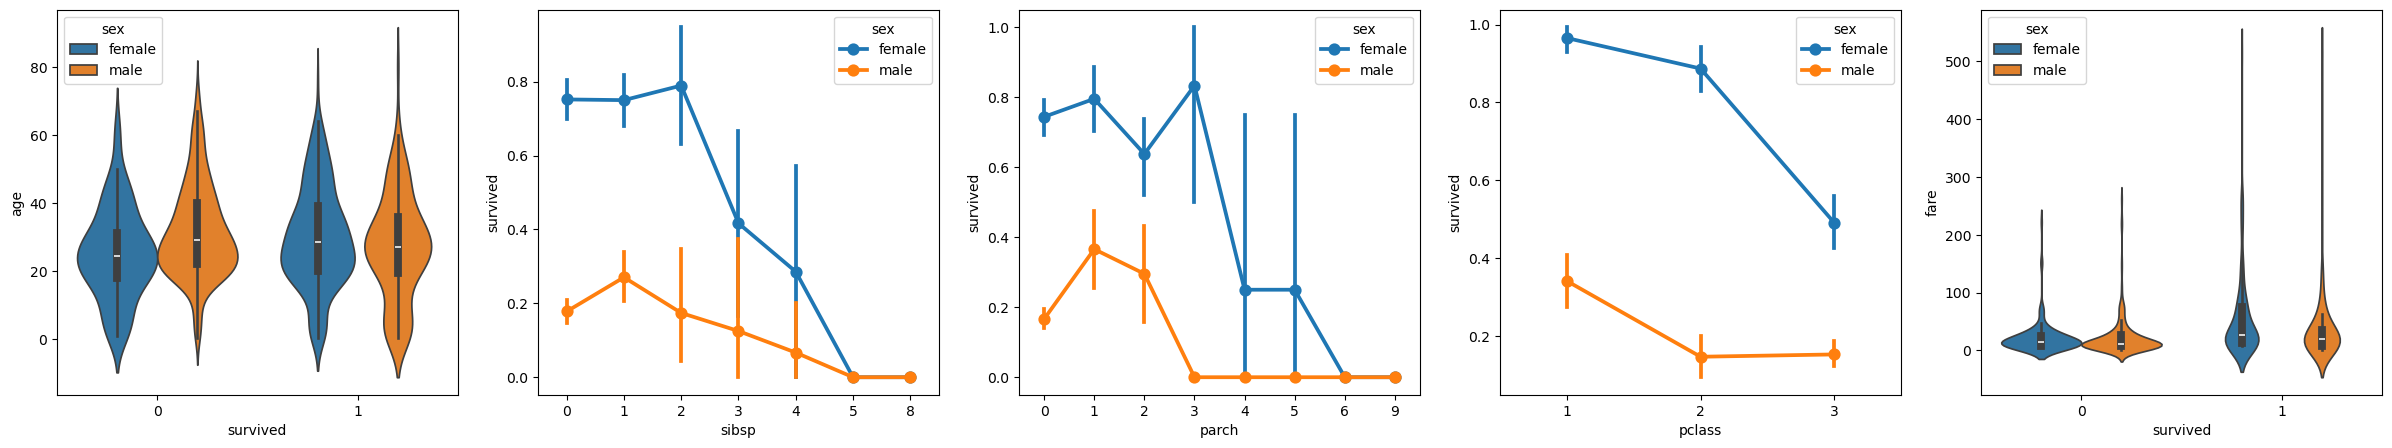

In [9]:
##Seaborn and Matplotlib to view how certain columns of the dataset relate to survivability. generated plots.
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [11]:
data.replace({'male': 1, 'female':0}, inplace=True)

C:\Users\BrunoOechsler\AppData\Local\Temp\ipykernel_16128\2023800680.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female':0}, inplace=True)


In [12]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [13]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [14]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

Train and evaluate a model

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [19]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


Use a neural network

A neural network is a model that uses weights and activation functions, modeling aspects of human neurons, to determine an outcome based on provided inputs. Unlike the machine learning algorithm you looked at previously, neural networks are a form of deep learning wherein you don't need to know an ideal algorithm for your problem set ahead of time. It can be used for many different scenarios and classification is one of them. For this section, you'll use the Keras library with TensorFlow to construct the neural network, and explore how it handles the Titanic dataset.

In [20]:
#The first step is to import the required libraries and to create the model. In this case, you'll use a Sequential neural network, 
# which is a layered neural network wherein there are multiple layers that feed into each other in sequence.

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [ ]:
#After defining the model, the next step is to add the layers of the neural network. For now, let's keep things simple and just use three layers. 
# Add the following code to create the layers of the neural network.

model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#The first layer will be set to have a dimension of 5, since you have five inputs: sex, pclass, age, relatives, and fare.
#The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive.
#The middle layer was kept at 5 for simplicity, although that value could have been different.

In [22]:
#You can also look at the summary of the model you built with this line of code:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Once the model is created, it needs to be compiled. As part of this, you need to define what type of optimizer will be used, 
# how loss will be calculated, and what metric should be optimized for. Add the following code to build and train the model. 
# You'll notice that after training, the accuracy is ~61%.

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5766
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6738 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 995us/step - loss: 0.6395 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.5861
Epoch 11/50
27/27

In [ ]:
#Now that the model is built and trained, we can see how it works against the test data.

y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

#Similar to the training, you'll notice that you now have 81% accuracy in predicting survival of passengers. 
# Using this simple neural network, the result is better than the 75% accuracy from the Naive Bayes Classifier tried previously.



7/7 [==============================] - 0s 3ms/step
0.8133971291866029
